In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_smape(dataset_name, group):

    if f"{dataset_name}_{group}_MQLoss" not in os.listdir() or f"{dataset_name}_{group}_DistributionLoss" not in os.listdir() :
        return

    MQL = pd.read_csv(f"{dataset_name}_{group}_MQLoss/smape_{dataset_name}_{group}_MQLoss.csv")
    DL = pd.read_csv(f"{dataset_name}_{group}_DistributionLoss/smape_{dataset_name}_{group}_DistributionLoss.csv")

    MQL.columns = [col.removeprefix("Auto").removesuffix("-median") for col in MQL.columns]
    DL.columns = [col.removeprefix("Auto").removesuffix("-median") for col in DL.columns]

    MQL_means = MQL.drop(columns='unique_id').mean()
    DL_means = DL.drop(columns='unique_id').mean()

    y_max = max(MQL_means.max(), DL_means.max())

    combined_means = pd.concat([MQL_means, DL_means], axis=1)
    combined_means.columns = ['MQL', 'DL']

    fig, ax = plt.subplots(figsize=(6, 6))

    bar_width = 0.35
    index = np.arange(len(combined_means))

    bar1 = ax.bar(index, combined_means['MQL'], bar_width, label='MQLoss', color='b')
    bar2 = ax.bar(index + bar_width, combined_means['DL'], bar_width, label='DistributionLoss', color='r')

    ax.set_xlabel('Models')
    ax.set_ylabel('SMAPE')
    ax.set_ylim(0, 1.2*y_max)
    ax.set_title(f'{dataset_name} ({group})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(combined_means.index)
    ax.legend(loc='upper right')

    plt.savefig(f"plots/smape_{dataset_name}_{group}.png")
    #plt.show()


/home/tonicardoso/anaconda3/envs/investigacao/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


['constant',
 'exchange_rate',
 'solar-energy',
 'electricity',
 'traffic',
 'exchange_rate_nips',
 'electricity_nips',
 'traffic_nips',
 'solar_nips',
 'wiki2000_nips',
 'wiki-rolling_nips',
 'taxi_30min',
 'kaggle_web_traffic_with_missing',
 'kaggle_web_traffic_without_missing',
 'kaggle_web_traffic_weekly',
 'm1_yearly',
 'm1_quarterly',
 'm1_monthly',
 'nn5_daily_with_missing',
 'nn5_daily_without_missing',
 'nn5_weekly',
 'tourism_monthly',
 'tourism_quarterly',
 'tourism_yearly',
 'cif_2016',
 'london_smart_meters_without_missing',
 'wind_farms_without_missing',
 'car_parts_without_missing',
 'dominick',
 'fred_md',
 'pedestrian_counts',
 'hospital',
 'covid_deaths',
 'kdd_cup_2018_without_missing',
 'weather',
 'm3_monthly',
 'm3_quarterly',
 'm3_yearly',
 'm3_other',
 'm4_hourly',
 'm4_daily',
 'm4_weekly',
 'm4_monthly',
 'm4_quarterly',
 'm4_yearly',
 'm5',
 'uber_tlc_daily',
 'uber_tlc_hourly',
 'airpassengers',
 'australian_electricity_demand',
 'electricity_hourly',
 'elec

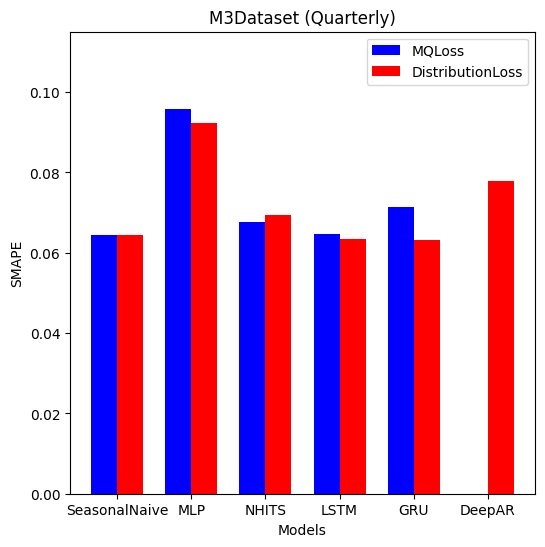

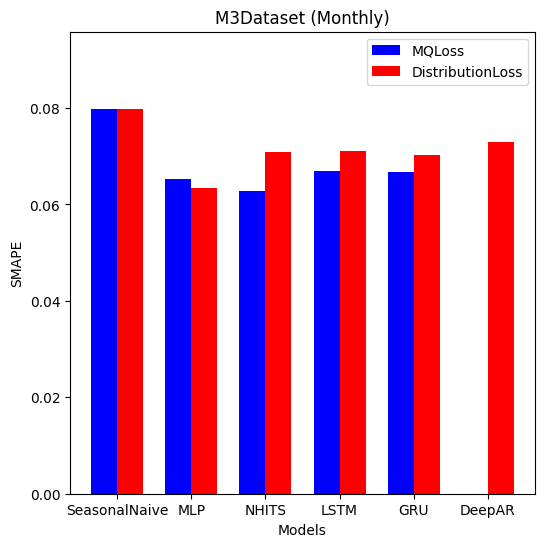

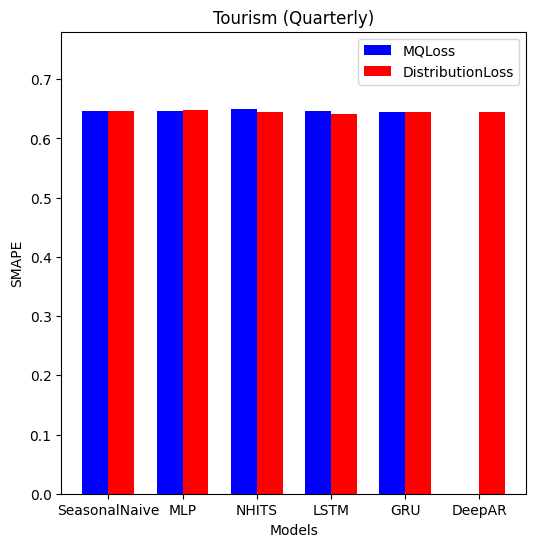

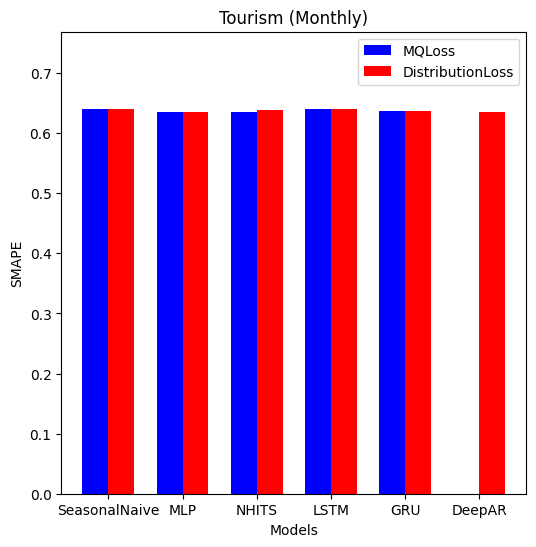

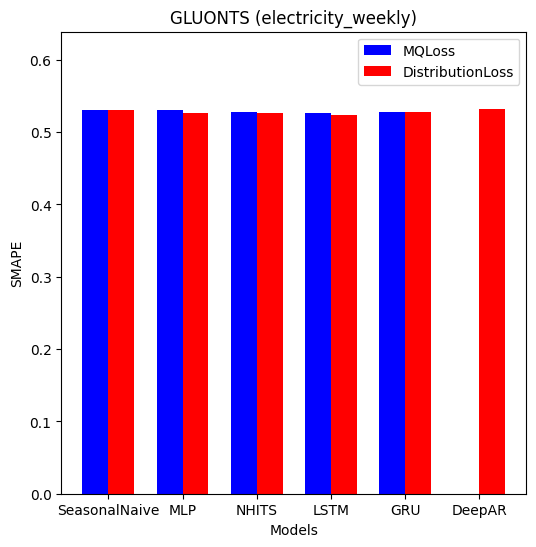

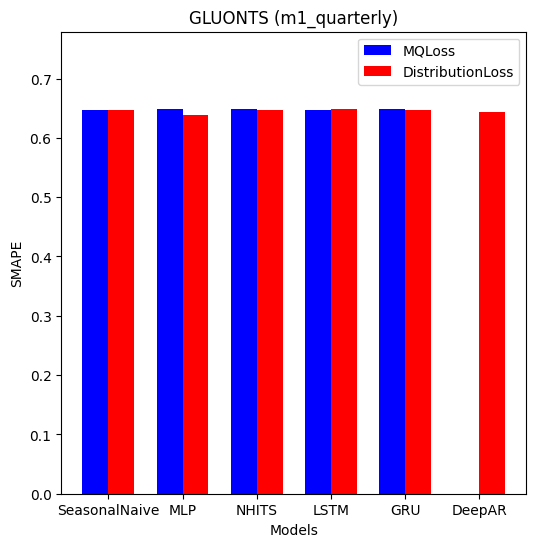

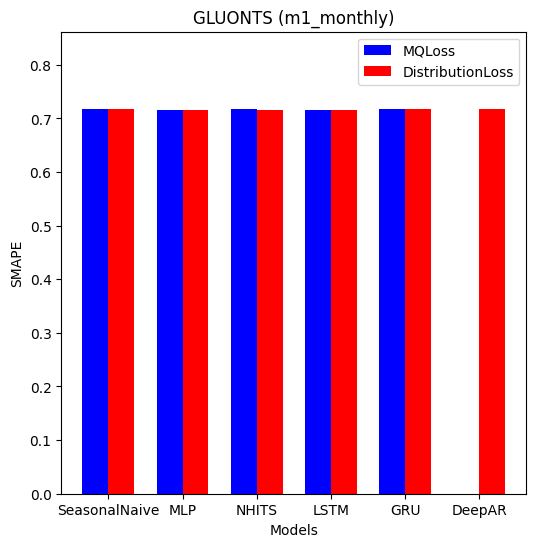

In [2]:
from codebase.load_data.m3 import M3Dataset
from codebase.load_data.tourism import TourismDataset
from codebase.load_data.gluonts import GluontsDataset

for dataset in [M3Dataset, TourismDataset, GluontsDataset]:
    for group in dataset.frequency_map.keys():
        plot_smape(dataset.DATASET_NAME, group)